# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# RDKit


## Reading Datasets

### I will start by importing the fda approved dataset with descriptors, and the pdb dataset with descriptors

In [2]:
PATH = "../../../../../../masters_data"

In [3]:
fda_approved = pd.read_csv(f"{PATH}/positive_datasets/fda_approved_rdkit.csv", low_memory=False)
print(fda_approved.shape)
fda_approved.head()

(1895, 222)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pdb = pd.read_csv(f"{PATH}/negative_datasets/pdb_rdkit.csv", low_memory=False)
print(pdb.shape)
pdb.head()

(12246, 211)


,clean_smiles,ROMol,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC1(C)O[C@H]2[C@@H]3OS(=O)(=O)O[C@@H]3CO[C@@]2...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685eb0>,11.424839,11.424839,0.214469,-4.255457,0.604287,361.350,346.230,361.013738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CNC(=O)c1cccc(C)c1Nc1nc(N2CCN(c3ccccc3Cl)CC2)n...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685cf0>,13.021951,13.021951,0.216392,-0.730956,0.170063,641.158,607.894,640.209548,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CCNC(=O)Nc1cc2c(-c3ccnc(C)c3)ccc(C)c2cn1,<rdkit.Chem.rdchem.Mol object at 0x7f900c685ba0>,11.744560,11.744560,0.251566,-0.251566,0.764657,320.396,300.236,320.163711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Clc1ccccc1Nc1ccnc(Nc2ccc(-c3nnn[nH]3)cc2)n1,<rdkit.Chem.rdchem.Mol object at 0x7f900c685d60>,6.162712,6.162712,0.468644,0.468644,0.494371,364.800,351.696,364.095170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,CC1=C(CCC(=O)O)c2cc3[nH]c(cc4nc(cc5[nH]c(cc1n2...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685e40>,12.555539,12.555539,0.007755,-4.847097,0.177686,670.722,640.482,670.140335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now I'll separate the calculated descriptors and the other columns in the datasets

In [5]:
# saving only the calculated descriptors

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
]

fda_approved_features = fda_approved.drop(labels=flag_columns, axis=1)

print(fda_approved_features.shape)
fda_approved_features.head()

(1895, 208)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# saving only the information variables

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
]

fda_approved_info = fda_approved[flag_columns]

print(fda_approved_info.shape)
fda_approved_info.head()

(1895, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [7]:
# saving only the calculated descriptors

flag_columns = [
    "clean_smiles",
    "ROMol",
]

pdb_features = pdb.drop(labels=flag_columns, axis=1)

print(pdb_features.shape)
pdb_features.head()

(12246, 209)


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.424839,11.424839,0.214469,-4.255457,0.604287,361.350,346.230,361.013738,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.021951,13.021951,0.216392,-0.730956,0.170063,641.158,607.894,640.209548,232.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.744560,11.744560,0.251566,-0.251566,0.764657,320.396,300.236,320.163711,122.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.162712,6.162712,0.468644,0.468644,0.494371,364.800,351.696,364.095170,128.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,12.555539,12.555539,0.007755,-4.847097,0.177686,670.722,640.482,670.140335,242.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "clean_smiles"
]

pdb_info = pdb[flag_columns]

print(pdb_info.shape)
pdb_info.head()

(12246, 1)


,clean_smiles
0,CC1(C)O[C@H]2[C@@H]3OS(=O)(=O)O[C@@H]3CO[C@@]2...
1,CNC(=O)c1cccc(C)c1Nc1nc(N2CCN(c3ccccc3Cl)CC2)n...
2,CCNC(=O)Nc1cc2c(-c3ccnc(C)c3)ccc(C)c2cn1
3,Clc1ccccc1Nc1ccnc(Nc2ccc(-c3nnn[nH]3)cc2)n1
4,CC1=C(CCC(=O)O)c2cc3[nH]c(cc4nc(cc5[nH]c(cc1n2...


### Now I'll merge them in one dataset

In [9]:
# merging calculated descriptors

molecules_features = pd.concat([fda_approved_features, pdb_features], axis=0)
print(molecules_features.shape)
molecules_features.head()

(14141, 209)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,AvgIpc
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [10]:
# merging molecules info

molecules_info = pd.concat([fda_approved_info, pdb_info], axis=0)
print(molecules_info.shape)
molecules_info.head()

(14141, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


## Checking for Non-Numeric Values

In [11]:
def display_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}")

In [12]:
display_non_numeric_values(molecules_features)

In [13]:
print(molecules_features.shape)
molecules_features.head()

(14141, 209)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,AvgIpc
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Checking for Infinity Values

### Here, we check for infinity values. If present, we replace them for NaN, to deal with later.

In [14]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(molecules_features))
print(f"Number of Infinity Values (np.inf) before: {num_infinity.sum()}")

# Replacing the negative and positive infinity values with nan
molecules_features = molecules_features.replace([np.inf, -np.inf], np.nan)

# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(molecules_features))

print(f"Number of Infinity Values (np.inf), after replacing it with NaN: {num_infinity.sum()}")

Number of Infinity Values (np.inf) before: 2
Number of Infinity Values (np.inf), after replacing it with NaN: 0


## Scaling the data

### Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [15]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_features)

# Merging the column name with the scale data array
molecules_features_scaled = pd.DataFrame(scaled_data, columns=molecules_features.columns)
print(molecules_features_scaled.shape)
molecules_features_scaled.head()

(14141, 209)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,AvgIpc
0,-2.444173,0.761144,-2.444319,0.728712,-0.800683,-1.347023,-1.366507,-1.346452,-1.270068,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN
1,-1.035501,0.698944,-1.035571,1.180902,-0.573656,-1.295979,-1.311542,-1.295415,-1.221457,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN
2,-1.127684,0.406874,-1.127759,3.304227,-0.747451,-1.292826,-1.304683,-1.292238,-1.221457,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,4.314620,NaN
3,-2.902208,1.355200,-2.902378,2.216351,-0.115972,-1.289325,-1.311305,-1.289036,-1.253864,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN
4,-0.992290,0.598883,-0.992358,1.908337,-0.292018,-1.286185,-1.304459,-1.285894,-1.253864,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN


## Zero Variance Filter

### Below is a function that removes columns with variance belowe a threshold. We will use 0 as a threshold, to keep only the molecules with non-zero variance. 

In [16]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [17]:
molecules_features_no_low_var = variance_threshold_selector(molecules_features_scaled, threshold=0)
print(molecules_features_no_low_var.shape)
molecules_features_no_low_var.head()

(14141, 204)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,AvgIpc
0,-2.444173,0.761144,-2.444319,0.728712,-0.800683,-1.347023,-1.366507,-1.346452,-1.270068,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN
1,-1.035501,0.698944,-1.035571,1.180902,-0.573656,-1.295979,-1.311542,-1.295415,-1.221457,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN
2,-1.127684,0.406874,-1.127759,3.304227,-0.747451,-1.292826,-1.304683,-1.292238,-1.221457,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,4.314620,NaN
3,-2.902208,1.355200,-2.902378,2.216351,-0.115972,-1.289325,-1.311305,-1.289036,-1.253864,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN
4,-0.992290,0.598883,-0.992358,1.908337,-0.292018,-1.286185,-1.304459,-1.285894,-1.253864,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,NaN


## Checking NaN molecules

In [18]:
print(f"Number of NaN: {molecules_features_no_low_var.isna().sum().sum()}")

Number of NaN: 2161


There are 1909 rows with at least one NaN value.


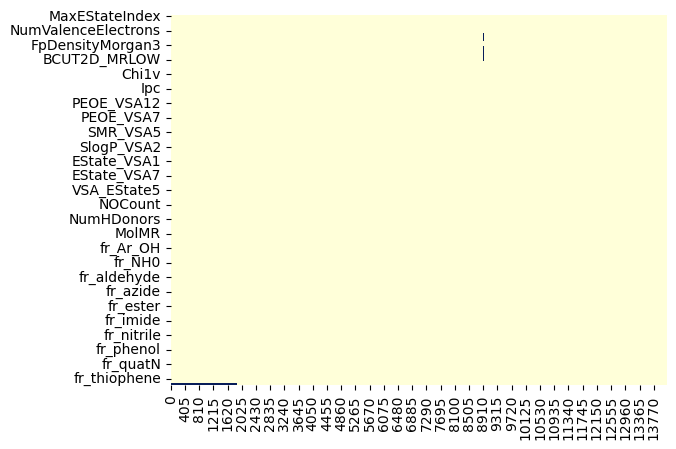

In [19]:
molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)]
print(f'There are {molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(molecules_features_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

## k-Nearest Neighbor (Imputation of NaN values)

KNN imputation is effective for certain situations:

- Good for continuous numerical data with unpredictable missing values.
- Suitable when similar data points share similar values and there's a clear data structure.
- Works well for small to medium-sized datasets with manageable computational cost.
- Captures complex relationships with multiple features.
- Doesn't assume linearity and handles outliers.
  
However, KNN may not be ideal:

- In high-dimensional data due to the "curse of dimensionality."
- With highly sparse data, leading to unreliable imputations.
- For large datasets due to computational intensity.
- For categorical data (better for numerical data).
- In imbalanced datasets favoring majority class imputations.

Before using KNN, explore data and compare with other imputation methods for best performance.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [21]:
print(f"Number of Nan values: {molecules_features_no_low_var.isna().sum().sum()}")

Number of Nan values: 2161


In [22]:
selector = KNNImputer(n_neighbors=5)
molecules_features_fill_na = selector.fit_transform(molecules_features_no_low_var)

In [23]:
molecules_features_no_na = pd.DataFrame(molecules_features_fill_na, columns=molecules_features_no_low_var.columns)
print(molecules_features_no_na.shape)
molecules_features_no_na.head()

(14141, 204)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,AvgIpc
0,-2.444173,0.761144,-2.444319,0.728712,-0.800683,-1.347023,-1.366507,-1.346452,-1.270068,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,-2.003207
1,-1.035501,0.698944,-1.035571,1.180902,-0.573656,-1.295979,-1.311542,-1.295415,-1.221457,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,-1.810637
2,-1.127684,0.406874,-1.127759,3.304227,-0.747451,-1.292826,-1.304683,-1.292238,-1.221457,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,4.314620,-1.983493
3,-2.902208,1.355200,-2.902378,2.216351,-0.115972,-1.289325,-1.311305,-1.289036,-1.253864,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,-2.000958
4,-0.992290,0.598883,-0.992358,1.908337,-0.292018,-1.286185,-1.304459,-1.285894,-1.253864,-0.130271,...,-0.309635,-0.136339,-0.063054,-0.097081,-0.181472,-0.011893,-0.202313,-0.267375,-0.218969,-2.565159


Number of Nan values: 0


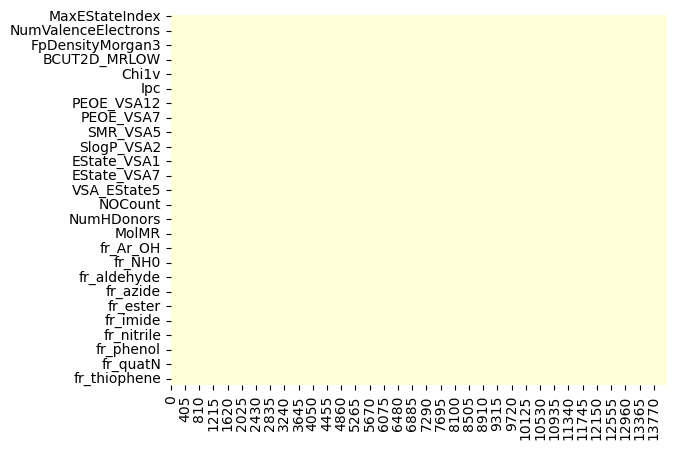

In [24]:
print(f"Number of Nan values: {molecules_features_no_na.isna().sum().sum()}")
g = sns.heatmap(molecules_features_no_na.isna().transpose(), cmap="YlGnBu", cbar=False)

## Descale the Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [25]:
# creating temporary dataset
drugs_scaler = molecules_features[molecules_features_no_na.columns].copy()
drugs_scaler.shape

(14141, 204)

In [26]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [27]:
# descaling
molecules_features_descaled = descaler.inverse_transform(molecules_features_no_na)
molecules_features_descaled = pd.DataFrame(molecules_features_descaled, columns=molecules_features_no_na.columns)

print(molecules_features_descaled.shape)
molecules_features_descaled.head()

(14141, 204)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,AvgIpc
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.708169
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.819326
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,1.0,1.719549
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.709467
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.383794


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [29]:
molecules_features_descaled[["MaxEStateIndex", "MaxAbsEStateIndex", "fr_thiocyan", "AvgIpc"]]

,MaxEStateIndex,MaxAbsEStateIndex,fr_thiocyan,AvgIpc
0,6.055556,6.055556,0.0,1.708169
1,9.451389,9.451389,0.0,1.819326
2,9.229167,9.229167,0.0,1.719549
3,4.951389,4.951389,0.0,1.709467
4,9.555556,9.555556,0.0,1.383794
...,...,...,...,...
14136,14.265188,14.265188,0.0,3.787465
14137,12.725733,12.725733,0.0,3.283887
14138,12.716538,12.716538,0.0,3.426324
14139,14.782038,14.782038,0.0,3.447152


In [30]:
molecules_features[["MaxEStateIndex", "MaxAbsEStateIndex", "fr_thiocyan", "AvgIpc"]]

,MaxEStateIndex,MaxAbsEStateIndex,fr_thiocyan,AvgIpc
0,6.055556,6.055556,0.0,NaN
1,9.451389,9.451389,0.0,NaN
2,9.229167,9.229167,0.0,NaN
3,4.951389,4.951389,0.0,NaN
4,9.555556,9.555556,0.0,NaN
...,...,...,...,...
12241,14.265188,14.265188,0.0,3.787465
12242,12.725733,12.725733,0.0,3.283887
12243,12.716538,12.716538,0.0,3.426324
12244,14.782038,14.782038,0.0,3.447152


## Re-join Info and Features Datasets

In [31]:
molecules_info = molecules_info.reset_index(drop=True)
molecules_features_descaled = molecules_features_descaled.reset_index(drop=True)

In [32]:
molecules_processed = pd.concat([molecules_info, molecules_features_descaled], axis=1)
print(molecules_processed.shape)
molecules_processed.head()

(14141, 218)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,AvgIpc
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.708169
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.819326
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,1.0,1.719549
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.709467
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,1.383794


## Save Datasets

In [33]:
molecules_processed.to_csv(f"{PATH}/pre_processed_datasets/pre_processed_pdb_rdkit.csv" ,index=False)
